# merging titles and  talent

In [1]:
# import the packages that will be used in this project

import pandas as pd
import requests as rq
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# setting pandas display to avoid scientific notation in my dataframes
pd.options.display.float_format = '{:.2f}'.format
    # - code generously donated by Dianne Tunnicliffe 
    # https://github.com/dtunnicliffe/movie-analysis-project/blob/project/microsoft_movie_analysis.ipynb

In [3]:
# read in the data from IMDB

# Two datafiles will be used here: (1) imdb.title.basics.csv.gz, and (2) imdb.title.ratings.csv.gz
names_by_id = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
title_and_genre = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
directors_and_writers = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
talent_list = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
popularity_and_votes = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
budget_and_gross = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

In [ ]:
# Lets see the director and writer for all films on the IMDB dataframes
# Lets merge all dataframes that have a common key (these will be the IMDB dataframes with 'tconst')

In [7]:
# Lets merge the 'title_and_genre' and 'directors_and_writers' dataframes on the common key 'tconst'
imdb_titles_dir_writer_merged_df = title_and_genre.merge(
    directors_and_writers, on='tconst')

imdb_titles_dir_writer_merged_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",nm0002411,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,nm0000080,"nm0000080,nm0462648"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama",nm0611531,nm0347899
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy","nm0765384,nm0749914","nm1360635,nm0749914"


In [8]:
# Since we don't have a common key on the 'names_by_id' dataframe we will pull a table with specific info that will make it easier to merge

directors_df = imdb_titles_dir_writer_merged_df[['tconst', 'original_title', 'start_year', 'directors']]

directors_df.head()

,tconst,original_title,start_year,directors
0,tt0063540,Sunghursh,2013,nm0712540
1,tt0066787,Ashad Ka Ek Din,2019,nm0002411
2,tt0069049,The Other Side of the Wind,2018,nm0000080
3,tt0069204,Sabse Bada Sukh,2018,nm0611531
4,tt0100275,La Telenovela Errante,2017,"nm0765384,nm0749914"


In [13]:
# And we'll change the directors column to be 'nconst' so we can merge on this common key

directors_df.rename({'directors':'nconst'}, axis=1, inplace=True)

directors_df.head()

/Users/patrick/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,tconst,original_title,start_year,nconst
0,tt0063540,Sunghursh,2013,nm0712540
1,tt0066787,Ashad Ka Ek Din,2019,nm0002411
2,tt0069049,The Other Side of the Wind,2018,nm0000080
3,tt0069204,Sabse Bada Sukh,2018,nm0611531
4,tt0100275,La Telenovela Errante,2017,"nm0765384,nm0749914"


In [11]:
# And now we merge 'directors_df' with 'names_by_id'
director_names_df = directors_df.merge(
    names_by_id, on='nconst')

director_names_df.head()


,tconst,original_title,start_year,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0063540,Sunghursh,2013,nm0712540,Harnam Singh Rawail,1921.00,2004.00,"director,writer,producer","tt0266757,tt0266712,tt0134996,tt0266765"
1,tt0066787,Ashad Ka Ek Din,2019,nm0002411,Mani Kaul,1944.00,2011.00,"director,writer,actor","tt0102515,tt0070009,tt0066514,tt0207626"
2,tt0069049,The Other Side of the Wind,2018,nm0000080,Orson Welles,1915.00,1985.00,"actor,director,writer","tt0048393,tt0052311,tt0057427,tt0033467"
3,tt0069204,Sabse Bada Sukh,2018,nm0611531,Hrishikesh Mukherjee,1922.00,2006.00,"director,editor,writer","tt0066763,tt0147855,tt0137362,tt0137361"
4,tt0111414,A Thin Life,2018,nm0398271,Frank Howson,1952.00,nan,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"


#### Clean ... 

In [12]:
# Lets merge this our top 30 grossing movies list and find out who those directors are



In [6]:
# Then merge the 'names_by_id' dataframe on the common key 'nconst' so we will have their names
imdb_titles_dir_writer_merged_df = imdb_titles_dir_writer_merged_df.merge(
    names_by_id, on='nconst')

imdb_titles_dir_writer_merged_df.head()

KeyError: 'nconst'

In [222]:
# # Lets clean this up and drop columns we don't need. We will keep job because it may tell us who the primary writer is
# imdb_titles_merged_df.drop(['original_title', 'start_year','runtime_minutes'], axis=1, inplace=True)

# # and check the dataframe
# imdb_titles_merged_df.head()

In [223]:
# Now we begin merging the other dataframes
# We'll begin with the names_by_id dataframe and merge on the 'nconst' key
imdb_titles_merged_df = imdb_titles_merged_df.merge(names_by_id, on='nconst')

# and check the resulting dataframe
imdb_titles_merged_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",10,nm0006210,composer,NaN,NaN,Naushad,1919.00,2006.00,"composer,soundtrack,music_department","tt0054910,tt0266765,tt0044392,tt0053999"
1,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",1,nm0474801,actor,NaN,"[""Kundan S. Prasad"",""Bajrangi""]",Dilip Kumar,1922.00,nan,"actor,writer,director","tt0058287,tt0054910,tt0047990,tt0084667"
2,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",2,nm0904537,actress,NaN,"[""Munni"",""Laila-E-Aasmaan""]",Vyjayanthimala,1933.00,nan,"actress,music_department,miscellaneous","tt0047990,tt0054910,tt0050665,tt0058547"
3,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",3,nm0756379,actor,NaN,"[""Ganeshi N. Prasad""]",Balraj Sahni,1913.00,1973.00,"actor,writer,director","tt0055039,tt0043307,tt0234827,tt0233326"
4,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",4,nm0474876,actor,NaN,"[""Dwarka N. Prasad""]",Sanjeev Kumar,1938.00,1985.00,actor,"tt0148841,tt0215517,tt0073707,tt0178186"


In [224]:
# Next lets merge the popularity_and_votes dataframe with a "right" merge, since we only want to keep titles that have a popularity score and votes
# We see the common key is 'original_title' so we will merge on this
imdb_titles_merged_df = imdb_titles_merged_df.merge(popularity_and_votes, on='original_title', how='right')

# and check the resulting dataframe
imdb_titles_merged_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,ordering,nconst,...,known_for_titles,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
0,tt0926084,Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Deathly Hallows: Part 1,2010.00,146.00,"Adventure,Fantasy,Mystery",nm0946734,"nm0460141,nm0746830",10.00,nm0006035,...,"tt1504320,tt0436697,tt1024648,tt2431286",0,"[12, 14, 10751]",12444,en,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,tt0926084,Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Deathly Hallows: Part 1,2010.00,146.00,"Adventure,Fantasy,Mystery",nm0946734,"nm0460141,nm0746830",5.00,nm0946734,...,"tt0918940,tt0373889,tt1201607,tt0926084",0,"[12, 14, 10751]",12444,en,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
2,tt0926084,Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Deathly Hallows: Part 1,2010.00,146.00,"Adventure,Fantasy,Mystery",nm0946734,"nm0460141,nm0746830",8.00,nm0057655,...,"tt1201607,tt0330373,tt0417741,tt0926084",0,"[12, 14, 10751]",12444,en,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
3,tt0926084,Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Deathly Hallows: Part 1,2010.00,146.00,"Adventure,Fantasy,Mystery",nm0946734,"nm0460141,nm0746830",1.00,nm0705356,...,"tt1528071,tt0926084,tt1201607,tt4034354",0,"[12, 14, 10751]",12444,en,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
4,tt0926084,Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Deathly Hallows: Part 1,2010.00,146.00,"Adventure,Fantasy,Mystery",nm0946734,"nm0460141,nm0746830",2.00,nm0914612,...,"tt0241527,tt2132285,tt1659337,tt2771200",0,"[12, 14, 10751]",12444,en,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788


In [225]:
# Lastly we will merge in the financials datafame, budget_and_gross, however we do not have a common key
# We see the dataframe has a key 'movie' which is the same as 'original_title' so we will change the column name to match
budget_and_gross.rename({'movie':'original_title'}, axis=1, inplace=True)
                         
# and check it
budget_and_gross.head()

,id,release_date,original_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [226]:
# Now lets merge it. We will do another right join to keep only titles with financial info
imdb_titles_merged_df = imdb_titles_merged_df.merge(budget_and_gross, on='original_title', how='right')

# and check it
imdb_titles_merged_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,ordering,nconst,...,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
0,NaN,NaN,Avatar,nan,nan,NaN,NaN,NaN,nan,NaN,...,26.53,2009-12-18,Avatar,7.40,18676.00,1,"Dec 18, 2009","$425,000,000","$760,507,625","$2,776,345,279"
1,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.00,136.00,"Action,Adventure,Fantasy",nm0551128,"nm0254645,nm0744429,nm0064181,nm0938684,nm0694627",1.00,nm0000136,...,30.58,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.40,8571.00,2,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875"
2,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.00,136.00,"Action,Adventure,Fantasy",nm0551128,"nm0254645,nm0744429,nm0064181,nm0938684,nm0694627",8.00,nm0064181,...,30.58,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.40,8571.00,2,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875"
3,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.00,136.00,"Action,Adventure,Fantasy",nm0551128,"nm0254645,nm0744429,nm0064181,nm0938684,nm0694627",4.00,nm0001691,...,30.58,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.40,8571.00,2,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875"
4,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.00,136.00,"Action,Adventure,Fantasy",nm0551128,"nm0254645,nm0744429,nm0064181,nm0938684,nm0694627",3.00,nm0574534,...,30.58,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.40,8571.00,2,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875"


## Let's start our analysis
### We are looking to draw inferences on
* a movies popularity, 
* its budget and gross, 
* and talent attached to popular and profitable movies

#### Some assumptions we can draw on the data:
1. The talent_list dataframe contains an ordering column with several different names attachd to the project, lets assume that the first entry (order value of 1) is the lead actor/actress

2. For simplicity's sake we will only focus on domestic gross

In [227]:
# Lets pull a table with movies and their popularity, budget and gross
# Lets check our keys and pull a table with only the keys were are interested in here, i.e. drop the rest

# checking keys:
imdb_titles_merged_df.info()

#we see that some 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36923 entries, 0 to 36922
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tconst              32942 non-null  object 
 1   primary_title       32942 non-null  object 
 2   original_title      36923 non-null  object 
 3   start_year          32942 non-null  float64
 4   runtime_minutes     30519 non-null  float64
 5   genres              32732 non-null  object 
 6   directors           32773 non-null  object 
 7   writers             31185 non-null  object 
 8   ordering            32942 non-null  float64
 9   nconst              32942 non-null  object 
 10  category            32942 non-null  object 
 11  job                 10260 non-null  object 
 12  characters          13329 non-null  object 
 13  primary_name        32942 non-null  object 
 14  birth_year          15656 non-null  float64
 15  death_year          615 non-null    float64
 16  prim

### For our analysis we want to focus on movies in the modern era as movies from 20 years ago have lower budgets and the technology is not comparable to today
#### Lets filter out titles that were made before the year 2000
#### We see from the info that 'start_year' is of type float, which will make filtering easier that converting to datetime


In [239]:
imdb_titles_merged_df = imdb_titles_merged_df[imdb_titles_merged_df['start_year'] >= 2010.00]

imdb_titles_merged_df['start_year'].min()

2010.0

In [240]:
# Lets pull a table with columns:
# ['original_title', 'popularity' 'vote_average', 'vote_count', 'production_budget', and 'domestic_gross']

popularity_and_budget = imdb_titles_merged_df[['original_title', 'popularity', 'vote_average', 'vote_count', 'production_budget', 'domestic_gross']]

# lets check it
popularity_and_budget.head(50)


,original_title,popularity,vote_average,vote_count,production_budget,domestic_gross
1,Pirates of the Caribbean: On Stranger Tides,30.58,6.40,8571.00,"$410,600,000","$241,063,875"
2,Pirates of the Caribbean: On Stranger Tides,30.58,6.40,8571.00,"$410,600,000","$241,063,875"
3,Pirates of the Caribbean: On Stranger Tides,30.58,6.40,8571.00,"$410,600,000","$241,063,875"
4,Pirates of the Caribbean: On Stranger Tides,30.58,6.40,8571.00,"$410,600,000","$241,063,875"
5,Pirates of the Caribbean: On Stranger Tides,30.58,6.40,8571.00,"$410,600,000","$241,063,875"
6,Pirates of the Caribbean: On Stranger Tides,30.58,6.40,8571.00,"$410,600,000","$241,063,875"
7,Pirates of the Caribbean: On Stranger Tides,30.58,6.40,8571.00,"$410,600,000","$241,063,875"
8,Pirates of the Caribbean: On Stranger Tides,30.58,6.40,8571.00,"$410,600,000","$241,063,875"
9,Pirates of the Caribbean: On Stranger Tides,30.58,6.40,8571.00,"$410,600,000","$241,063,875"
10,Pirates of the Caribbean: On Stranger Tides,30.58,6.40,8571.00,"$410,600,000","$241,063,875"


In [241]:
# We see we have several repeating movies (from the talent_list merge), and some null values for popularity

# If we are looking at popularity and votes, we can seee that some titles have null values for these columns
# lets create a table for use specifically when analysing popularity
popularity_non_null = popularity_and_budget.dropna(subset=['popularity'], axis=0)

# and check
popularity_non_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32942 entries, 1 to 36913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     32942 non-null  object 
 1   popularity         32942 non-null  float64
 2   vote_average       32942 non-null  float64
 3   vote_count         32942 non-null  float64
 4   production_budget  32942 non-null  object 
 5   domestic_gross     32942 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.8+ MB


In [242]:
# Lets filter the data to only show unique titles

popularity_non_null.drop_duplicates(subset=['original_title'], inplace=True)

# and check
popularity_non_null.head()

,original_title,popularity,vote_average,vote_count,production_budget,domestic_gross
1,Pirates of the Caribbean: On Stranger Tides,30.58,6.40,8571.00,"$410,600,000","$241,063,875"
12,Avengers: Age of Ultron,44.38,7.30,13457.00,"$330,600,000","$459,005,868"
24,Avengers: Infinity War,80.77,8.30,13948.00,"$300,000,000","$678,815,482"
35,Justice League,34.95,6.20,7510.00,"$300,000,000","$229,024,295"
55,Spectre,30.32,6.40,6719.00,"$300,000,000","$200,074,175"


#### That's clean, now we have a subset of titles that have popularity and financials to work with

In [296]:
# But what if we have a title that has financials but no popularity value?
# Lets create a table of titles with financials and no duplicates to work with as well

# Create table of financials
movie_financials = imdb_titles_merged_df[['original_title', 'production_budget', 'domestic_gross']]

# and drop duplicates
movie_financials.drop_duplicates(subset=['original_title'], inplace=True)

# and check
movie_financials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1760 entries, 1 to 36906
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   original_title     1760 non-null   object
 1   production_budget  1760 non-null   object
 2   domestic_gross     1760 non-null   object
dtypes: object(3)
memory usage: 55.0+ KB


<ipython-input-296-d3ad5c758835>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_financials.drop_duplicates(subset=['original_title'], inplace=True)


#### That's clean too, now we have a subset of all titles and their financials to work with

#### We have a problem here though, the financials are in dtype=object, which will not allow us to operate on them as numbers, so we will need to somehow transpose the information into number form

In [244]:
# Lets create a function that will take an object/value and make it into a number

def drop_dollar_sign_and_commas(value):
    """
    This will split the object into a list of characters using the list() function
    Then iterate over the list and drop the $ sign, and remove commas from the list
    - We will use the .remove() method to drop the $, however we will have to use a for loop to remove the commas because .remove() will only remove the first instance, and some values contain more than one comma
    Then after the $ and commas have been removed from the list, we will the .join() method to reconneect the list items into a string
    We then turn the resulting string into a float, save the resulting float back to the original input object and return it
    Now we have float dtypes that allow us to operate on mathematically
    """
    
    value_list = list(value)
    value_list.remove('$')
    for char in value_list:
        if ',' == char:
            value_list.remove(char)
    value_float = float(''.join(value_list))
    value = value_float
    return value

In [245]:
# lets map this function on our financial columns creating new columns
movie_financials['Budget'] = movie_financials['production_budget'].map(drop_dollar_sign_and_commas)
movie_financials['Domestic Gross'] = movie_financials['domestic_gross'].map(drop_dollar_sign_and_commas)

# and check it
movie_financials.head()

<ipython-input-245-175966651728>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_financials['Budget'] = movie_financials['production_budget'].map(drop_dollar_sign_and_commas)
<ipython-input-245-175966651728>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_financials['Domestic Gross'] = movie_financials['domestic_gross'].map(drop_dollar_sign_and_commas)


,original_title,production_budget,domestic_gross,Budget,Domestic Gross
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",410600000.00,241063875.00
12,Avengers: Age of Ultron,"$330,600,000","$459,005,868",330600000.00,459005868.00
24,Avengers: Infinity War,"$300,000,000","$678,815,482",300000000.00,678815482.00
35,Justice League,"$300,000,000","$229,024,295",300000000.00,229024295.00
55,Spectre,"$300,000,000","$200,074,175",300000000.00,200074175.00


In [246]:
# lets drop the object columns since we won't need those for the analysis derived on this table
movie_financials.drop(['production_budget', 'domestic_gross'], axis=1, inplace=True)

# and check it
movie_financials.head()

/Users/patrick/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,original_title,Budget,Domestic Gross
1,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00
12,Avengers: Age of Ultron,330600000.00,459005868.00
24,Avengers: Infinity War,300000000.00,678815482.00
35,Justice League,300000000.00,229024295.00
55,Spectre,300000000.00,200074175.00


In [247]:
movie_financials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1760 entries, 1 to 36906
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  1760 non-null   object 
 1   Budget          1760 non-null   float64
 2   Domestic Gross  1760 non-null   float64
dtypes: float64(2), object(1)
memory usage: 55.0+ KB


In [248]:
# 5698 movies is a lot to work with
# Lets wittle this down to the top 30 grossing movies
top_50_grossing_movies = movie_financials.sort_values(by='Domestic Gross', ascending=False).head(30)

top_50_grossing_movies

,original_title,Budget,Domestic Gross
493,Black Panther,200000000.00,700059566.00
24,Avengers: Infinity War,300000000.00,678815482.00
261,Jurassic World,215000000.00,652270625.00
199,The Avengers,225000000.00,623279547.00
514,Incredibles 2,200000000.00,608581744.00
1437,Beauty and the Beast,160000000.00,504014165.00
526,Finding Dory,200000000.00,486295561.00
12,Avengers: Age of Ultron,330600000.00,459005868.00
75,The Dark Knight Rises,275000000.00,448139099.00
2217,The Hunger Games: Catching Fire,130000000.00,424668047.00


### lets visualize this based on gross and budget stacked, which will allow us to see the profit made

#### Currency function code generously donated from [dataxizpyr](https://datavizpyr.com/add-dollar-sign-on-axis-ticks-in-matplotlib/)

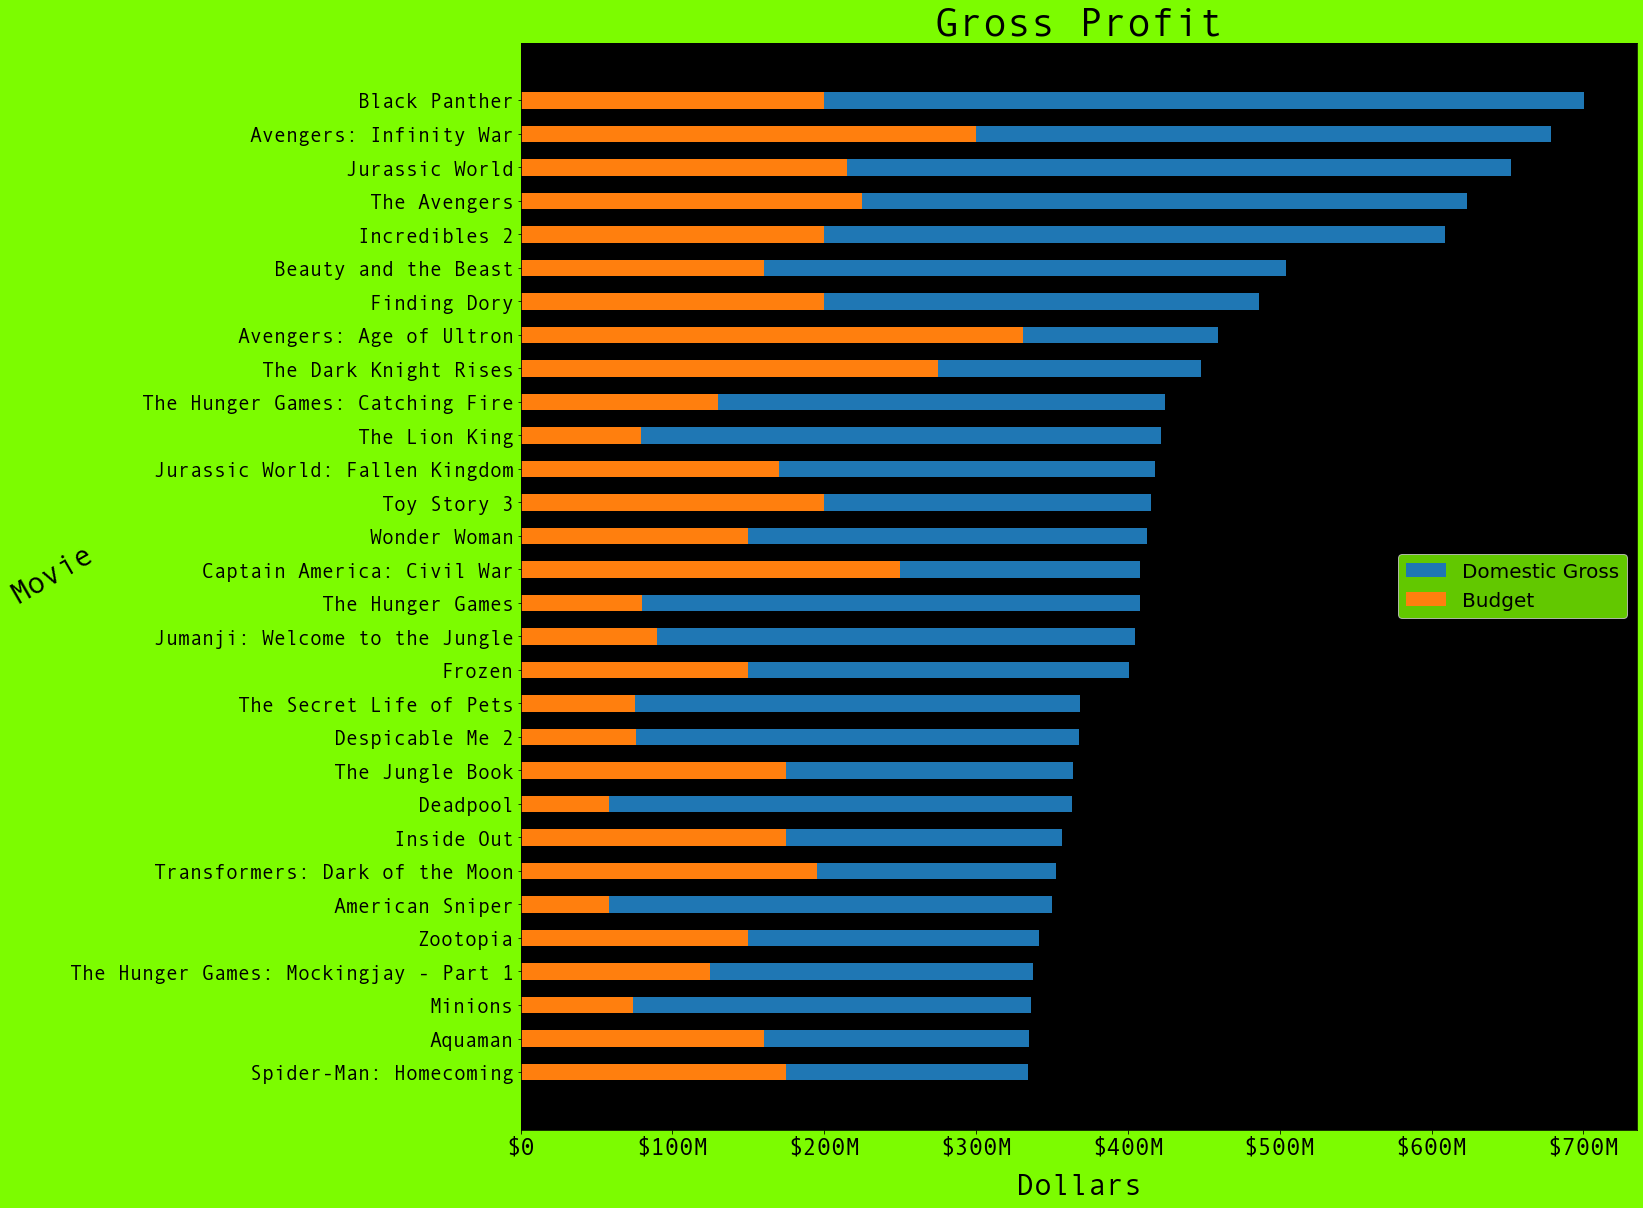

In [281]:
# Create a function to convert ticks to currency

def currency(x, pos):
    """
    This function will format a tick of float type to currency
    The two args are the value and tick position
    """
    if x >= 1e6:
        s = '${:1.0f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}'.format(x*1e-3)
    return s

# Now lets create the plot
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
fig.set_facecolor('lawngreen')
ax.set_facecolor('black')
ax.barh(top_50_grossing_movies['original_title'], width=top_50_grossing_movies['Domestic Gross'], height=0.5)
ax.barh(top_50_grossing_movies['original_title'], width=top_50_grossing_movies['Budget'], height=0.5)
ax.set_xlabel('Dollars', font='Andale Mono', fontsize=30, labelpad=15)
ax.set_ylabel('Movie', rotation=30, font='Andale Mono', fontsize=30, labelpad=10)
ax.set_title('Gross Profit', font='Andale Mono', fontsize=40, weight='bold', loc="center", pad=0)
labels = 'Domestic Gross', 'Budget'
ax.legend(labels, fontsize=20, facecolor='lawngreen', loc=7)
plt.xticks(font='Andale Mono', fontsize=24, weight='bold')
plt.yticks(font='Andale Mono', fontsize=20, weight='bold')
ax.invert_yaxis()
plt.ticklabel_format(axis='x', style='plain')
ax.xaxis.set_major_formatter(currency)

In [275]:
# Lets check out the popularity of movies

top_30_popular = popularity_non_null.sort_values(by='popularity', ascending=False).head(30)


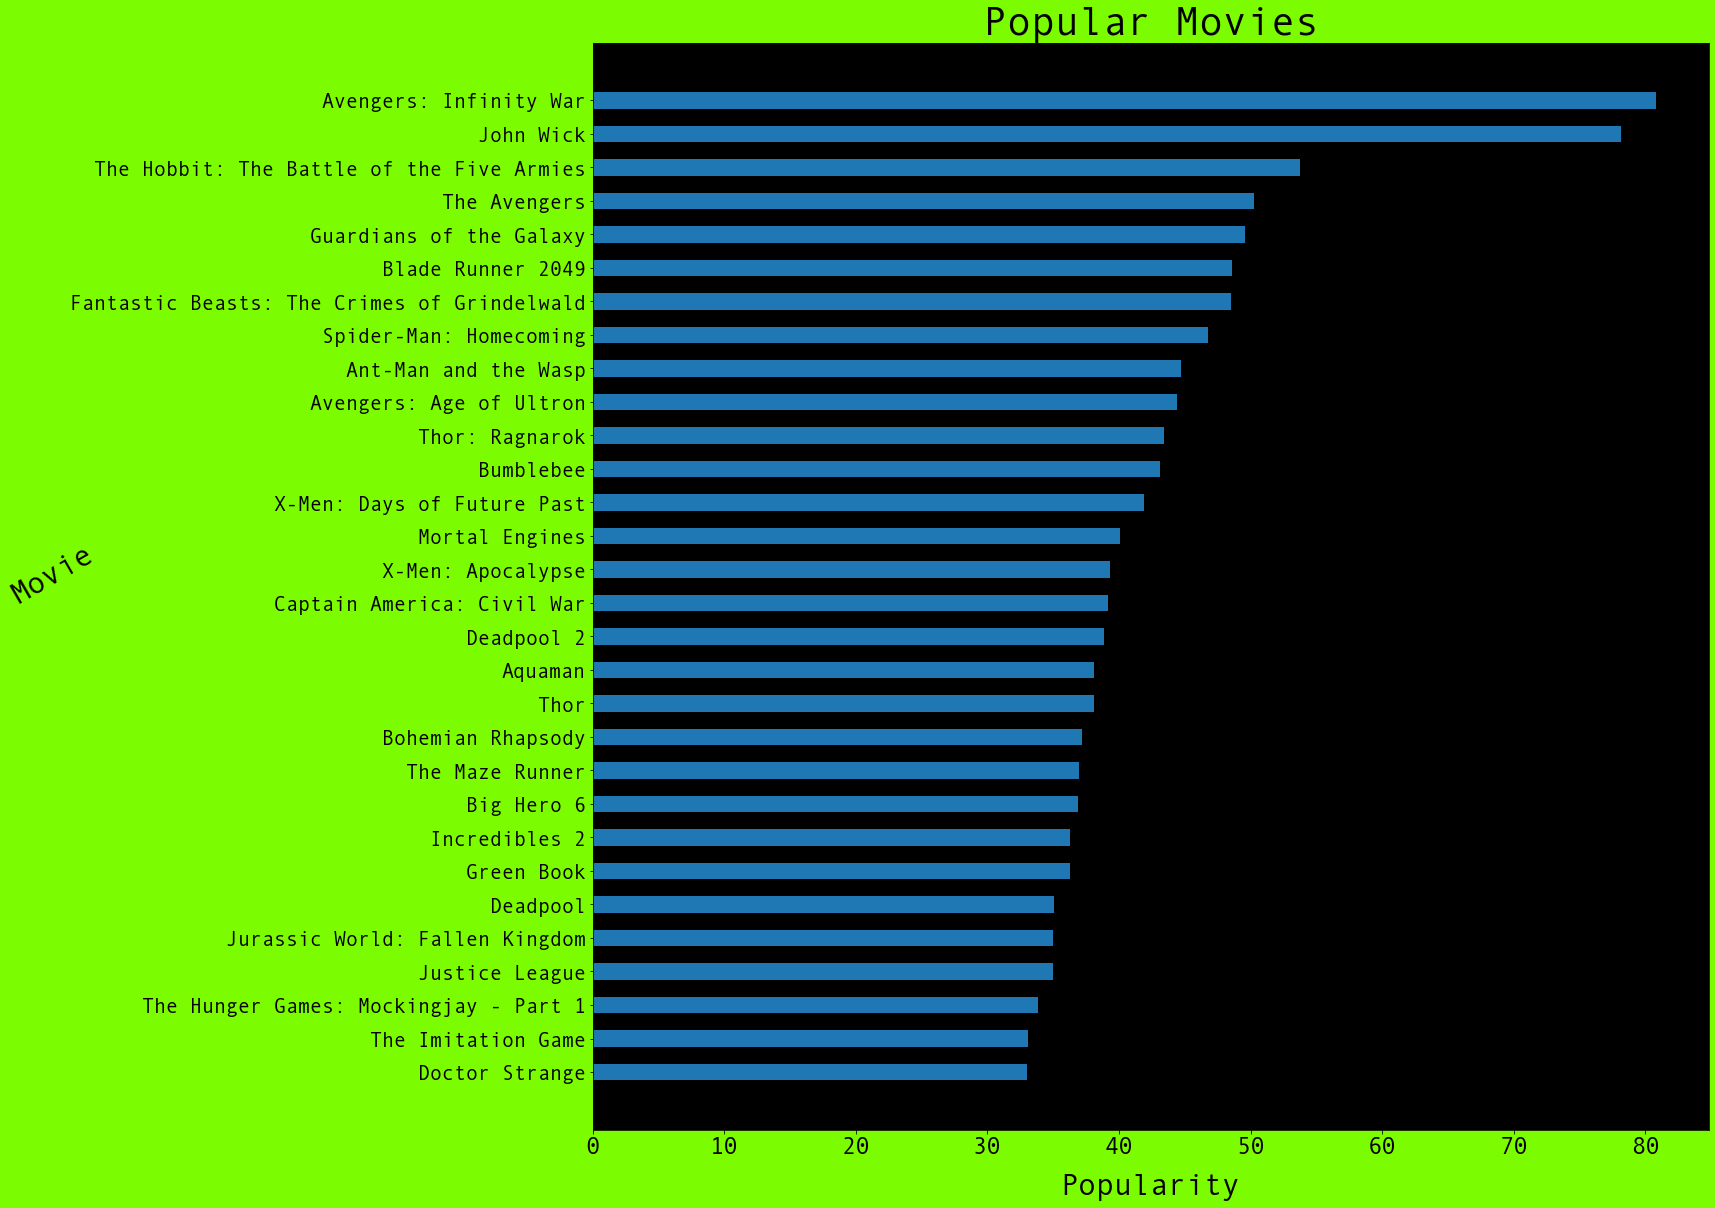

In [278]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
fig.set_facecolor('lawngreen')
ax.set_facecolor('black')
ax.barh(top_30_popular['original_title'], width=top_30_popular['popularity'], height=0.5)
ax.set_xlabel('Popularity', font='Andale Mono', fontsize=30, labelpad=15)
ax.set_ylabel('Movie', rotation=30, font='Andale Mono', fontsize=30, labelpad=10)
ax.set_title('Popular Movies', font='Andale Mono', fontsize=40, weight='bold', loc="center", pad=0)
labels = 'Domestic Gross', 'Budget'
# ax.legend(labels, fontsize=20, facecolor='lawngreen', loc=7)
plt.xticks(font='Andale Mono', fontsize=24, weight='bold')
plt.yticks(font='Andale Mono', fontsize=20, weight='bold')
ax.invert_yaxis()

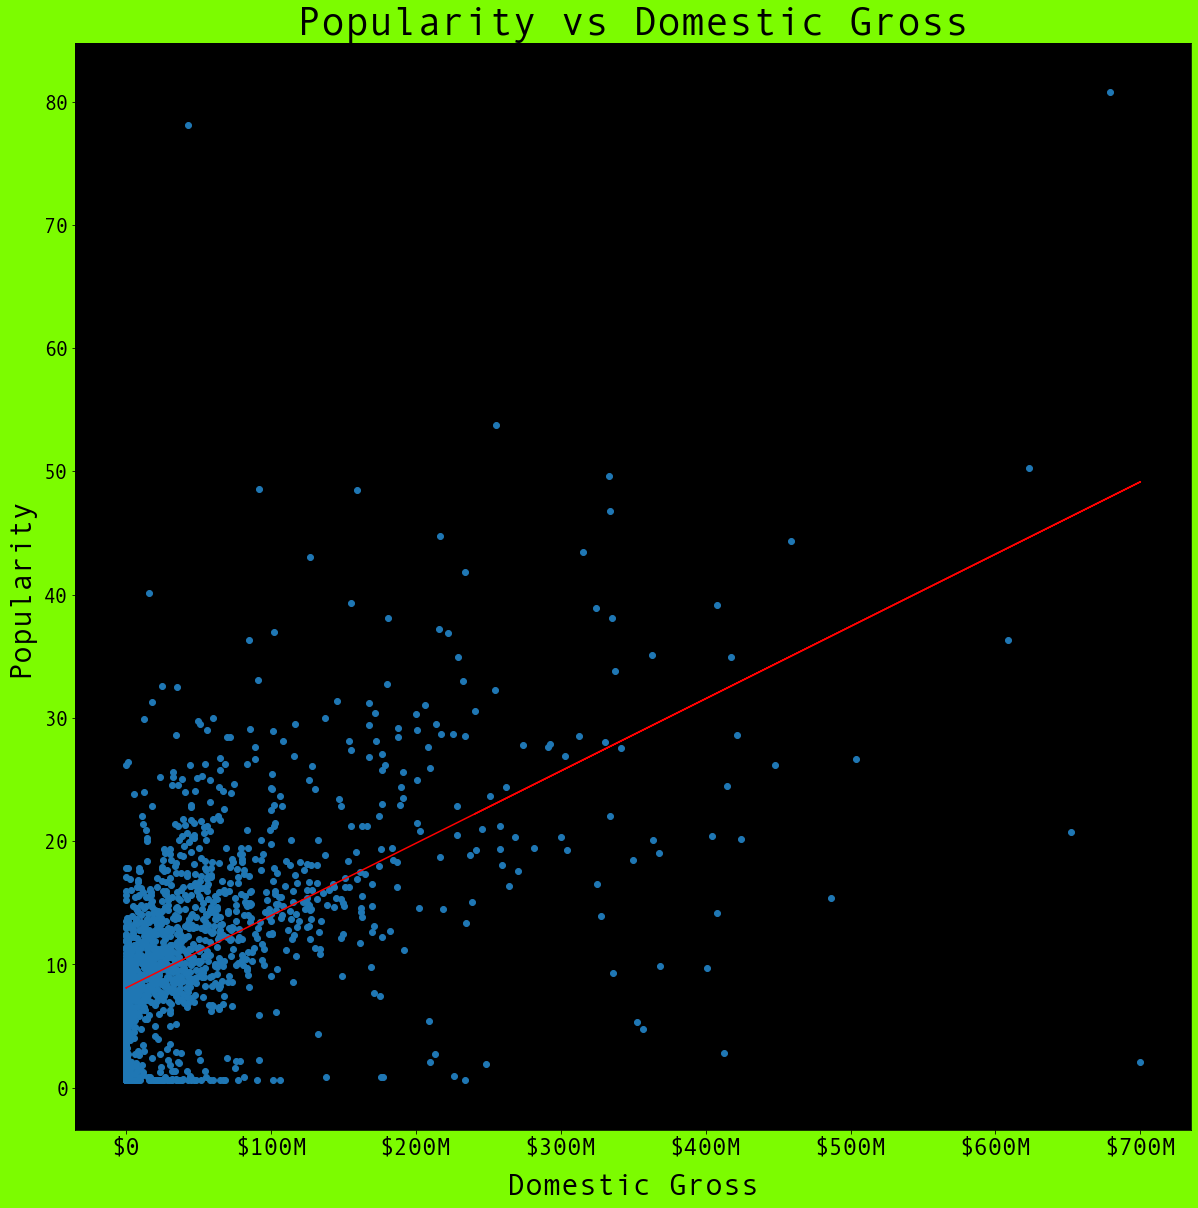

In [293]:
# Lets check the correlation between popularity an domestic gross

fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
fig.set_facecolor('lawngreen')
ax.set_facecolor('black')
ax.scatter(movie_financials['Domestic Gross'], popularity_non_null['popularity'])
ax.set_xlabel('Domestic Gross', font='Andale Mono', fontsize=30, labelpad=15)
ax.set_ylabel('Popularity', rotation=90, font='Andale Mono', fontsize=30, labelpad=10)
ax.set_title('Popularity vs Domestic Gross', font='Andale Mono', fontsize=40, weight='bold', loc="center", pad=0)
# labels = 'Domestic Gross', 'Budget'
# ax.legend(labels, fontsize=20, facecolor='lawngreen', loc=7)
plt.xticks(font='Andale Mono', fontsize=24, weight='bold')
plt.yticks(font='Andale Mono', fontsize=20, weight='bold')
# ax.invert_yaxis()
ax.xaxis.set_major_formatter(currency)
m, b = np.polyfit(movie_financials['Domestic Gross'], popularity_non_null['popularity'], 1)

#add linear regression line to scatterplot 
plt.plot(movie_financials['Domestic Gross'], m*movie_financials['Domestic Gross']+b, color='red')

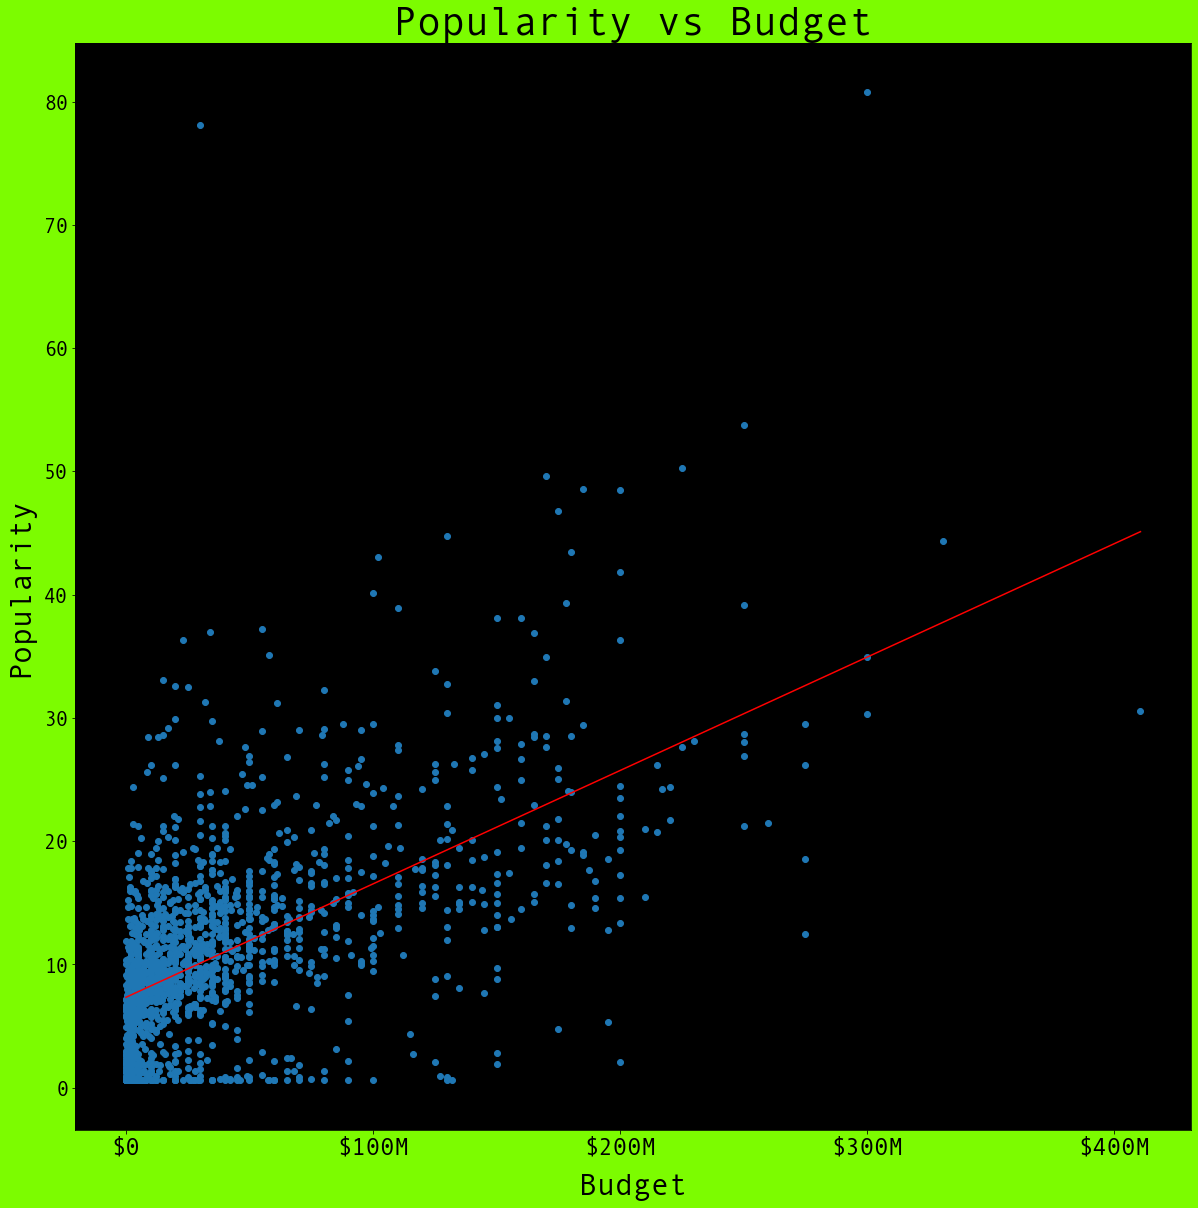

In [294]:
# Lets do the same for popularity an budget

fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
fig.set_facecolor('lawngreen')
ax.set_facecolor('black')
ax.scatter(movie_financials['Budget'], popularity_non_null['popularity'])
ax.set_xlabel('Budget', font='Andale Mono', fontsize=30, labelpad=15)
ax.set_ylabel('Popularity', rotation=90, font='Andale Mono', fontsize=30, labelpad=10)
ax.set_title('Popularity vs Budget', font='Andale Mono', fontsize=40, weight='bold', loc="center", pad=0)
# labels = 'Domestic Gross', 'Budget'
# ax.legend(labels, fontsize=20, facecolor='lawngreen', loc=7)
plt.xticks(font='Andale Mono', fontsize=24, weight='bold')
plt.yticks(font='Andale Mono', fontsize=20, weight='bold')
# ax.invert_yaxis()
ax.xaxis.set_major_formatter(currency)
m, b = np.polyfit(movie_financials['Budget'], popularity_non_null['popularity'], 1)

#add linear regression line to scatterplot 
plt.plot(movie_financials['Budget'], m*movie_financials['Budget']+b, color='red')